In [2]:
!pip install mplcyberpunk

  Using cached mplcyberpunk-0.7.5-py3-none-any.whl.metadata (3.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached mplcyberpunk-0.7.5-py3-none-any.whl (6.5 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


In [3]:
!pip install yfinance

  Using cached yfinance-0.2.52-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
  Using cached frozendict-2.4.6-py312-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.8-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached yfinance-0.2.52-py2.py3-none-any.whl (108 kB)
Using cached frozendict-2.4.6-py312-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl (3.8 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\Scripts\\pwiz.py'
Consider using the `--user` option or check the permissions.



In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np

# 2 - Pegar as cotações históricas

In [5]:
tickers = ["^BVSP", "^GSPC", "BRL=X", "BTC-USD"]

In [6]:
dados_mercado = yf.download(tickers, period = "6mo", auto_adjust = False)
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%***********************]  4 of 4 completed


Ticker,BRL=X,BTC-USD,^BVSP,^GSPC
Date,,,,
2024-07-31,5.6111,64619.250000,127652.000000,5522.299805
2024-08-01,5.6566,65357.500000,127395.000000,5446.680176
2024-08-02,5.7506,61415.066406,125854.000000,5346.560059
2024-08-03,NaN,60680.093750,NaN,NaN
2024-08-04,NaN,58116.976562,NaN,NaN
...,...,...,...,...
2025-01-27,5.9091,102087.687500,124862.000000,6012.279785
2025-01-28,5.8926,101332.476562,124056.000000,6067.700195
2025-01-29,5.8561,103703.210938,123432.000000,6039.310059


In [7]:
dados_mercado.dropna(inplace=True)

In [8]:
dados_mercado.columns = ["DOLAR", "BTC", "IBOV", "S&P500"]
dados_mercado

,DOLAR,BTC,IBOV,S&P500
Date,,,,
2024-07-31,5.6111,64619.250000,127652.000000,5522.299805
2024-08-01,5.6566,65357.500000,127395.000000,5446.680176
2024-08-02,5.7506,61415.066406,125854.000000,5346.560059
2024-08-05,5.7267,53991.457031,125270.000000,5186.330078
2024-08-06,5.7209,56034.316406,126267.000000,5240.029785
...,...,...,...,...
2025-01-27,5.9091,102087.687500,124862.000000,6012.279785
2025-01-28,5.8926,101332.476562,124056.000000,6067.700195
2025-01-29,5.8561,103703.210938,123432.000000,6039.310059


# 4 - Criar graficos de performance

In [9]:
plt.style.use("cyberpunk")

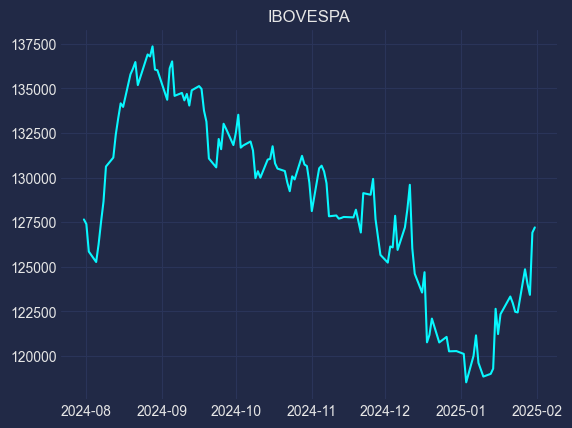

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(dados_mercado["IBOV"])
plt.title("IBOVESPA")
plt.show()
plt.savefig("ibovespa.png")

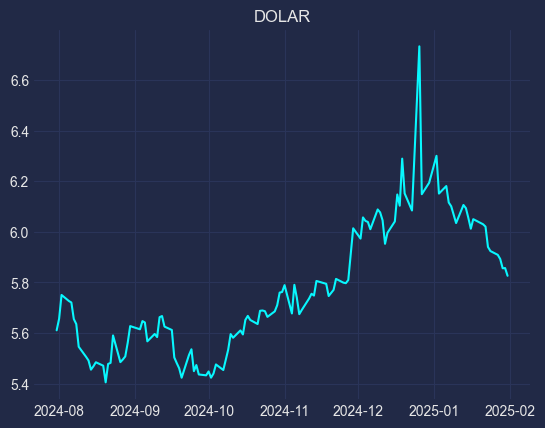

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")
plt.show()
plt.savefig("dolar.png")

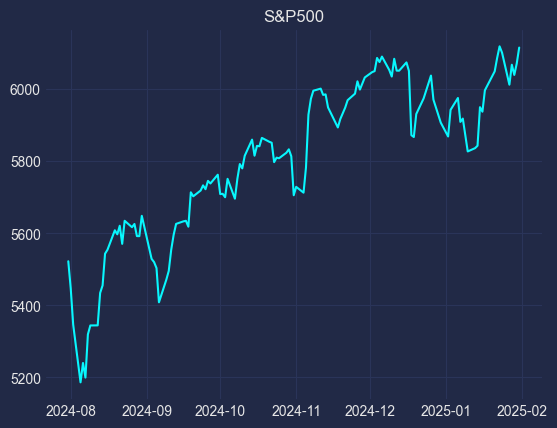

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")
plt.show()
plt.savefig("sp500.png")

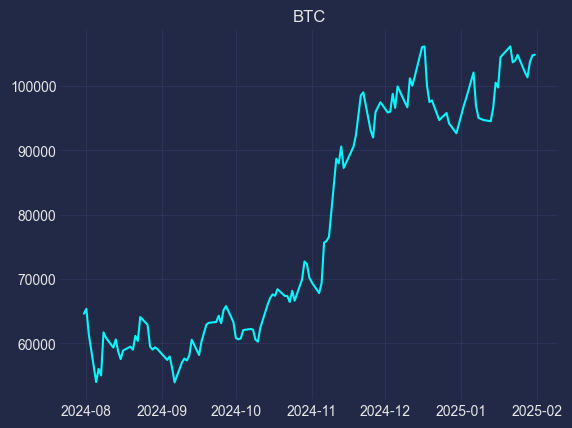

<Figure size 640x480 with 0 Axes>

In [13]:
plt.plot(dados_mercado["BTC"])
plt.title("BTC")
plt.show()
plt.savefig("btc.png")

In [14]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,BTC,IBOV,S&P500
Date,,,,
2024-07-31,NaN,NaN,NaN,NaN
2024-08-01,0.008109,0.011425,-0.002013,-0.013694
2024-08-02,0.016618,-0.060321,-0.012096,-0.018382
2024-08-05,-0.004156,-0.120876,-0.004640,-0.029969
2024-08-06,-0.001013,0.037837,0.007959,0.010354
...,...,...,...,...
2025-01-27,-0.002515,-0.026062,0.019723,-0.014581
2025-01-28,-0.002792,-0.007398,-0.006455,0.009218
2025-01-29,-0.006194,0.023396,-0.005030,-0.004679


In [15]:
retorno_dolar = retornos_diarios["DOLAR"].iloc[-1]
retorno_ibovespa = retornos_diarios["IBOV"].iloc[-1]
retorno_sp = retornos_diarios["S&P500"].iloc[-1]
retorno_btc = retornos_diarios["BTC"].iloc[-1]

retorno_dolar_pct = round(retorno_dolar * 100, 2)
retorno_ibovespa_pct = round(retorno_ibovespa * 100, 2)
retorno_sp_pct = round(retorno_sp * 100, 2)
retorno_btc_pct = round(retorno_btc * 100, 2)


In [16]:
retorno_dolar_str = str(retorno_dolar_pct) + "%"
retorno_ibovespa_str = str(retorno_ibovespa_pct) + "%"
retorno_sp_str = str(retorno_sp_pct) + "%"
retorno_btc_str = str(retorno_btc_pct) + "%"

print(retorno_dolar_str)
print(retorno_ibovespa_str)
print(retorno_sp_str)
print(retorno_btc_str)

-0.52%
0.23%
0.73%
0.11%


# 6 - Configurar e enviar o e-mail

In [17]:
import os
import smtplib
from email.message import EmailMessage

In [18]:
email = "seuemail@gmail.com"

In [19]:
with open('senha.txt') as f:
  senha = f.readlines()

  f.close()

senha_do_email = senha[0]

senha_do_email

'uinbcmkalqqsujfr'

In [20]:
msg = EmailMessage()
msg['Subject'] = 'Enviando e-mail com Python'
msg['From'] = 'seuemail@gmail.com'
msg['To'] = 'seuemail@outlook.com'
msg.set_content(f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa_str}.
* O Dólar teve o retorno de {retorno_dolar_str}.
* O S&P500 teve o retorno de {retorno_sp_str}.
* O BTC teve o retorno de {retorno_btc_str}.

Segue em anexo a peformance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''
)

with open('ibovespa.png', 'rb') as f:
    file_data = f.read()
    file_name = f.name
msg.add_attachment(file_data, maintype='image', subtype='png', filename=file_name)

with open('dolar.png', 'rb') as f:
    file_data = f.read()
    file_name = f.name
msg.add_attachment(file_data, maintype='image', subtype='png', filename=file_name)

with open('sp500.png', 'rb') as f:
    file_data = f.read()
    file_name = f.name
msg.add_attachment(file_data, maintype='image', subtype='png', filename=file_name)

with open('btc.png', 'rb') as f:
    file_data = f.read()
    file_name = f.name
msg.add_attachment(file_data, maintype='image', subtype='png', filename=file_name)

with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:

    smtp.login(email, senha_do_email)
    smtp.send_message(msg)


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials 98e67ed59e1d1-2f83bc97e71sm6806329a91.2 - gsmtp')